In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-p0ijn935 because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Physical samples

In [2]:
# file = uproot.open("data/GenInfo_only_90.root")
file = uproot.open("../analysis_run3/GenInfo_ATo2Tau/CMSSW_13_0_17/src/Gen/Ntuples/Combined_GenInfo_only_A_2Tau_m3p6To18_pT30To300_v2_unbiased.root")
RHTree = file["fevt/RHTree"]

In [3]:
RHTree.keys()
# RHTree.typenames()
# RHTree.show()

['Event',
 'Run',
 'LumiSection',
 'GenA1_inv',
 'GenA1',
 'dR_A1_Tau1',
 'dR_A1_Tau2',
 'dR_Tau1_Tau2',
 'A1_pt',
 'Tau1_pt',
 'Tau2_pt',
 'A1_eta',
 'Tau1_eta',
 'Tau2_eta',
 'A1_phi',
 'Tau1_phi',
 'Tau2_phi',
 'Tau1_Tau2_deta',
 'Tau1_Tau2_dphi']

In [4]:
out_dir='../analysis_run3/AN_Note_Plot/ATo2Tau_gen_plots'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

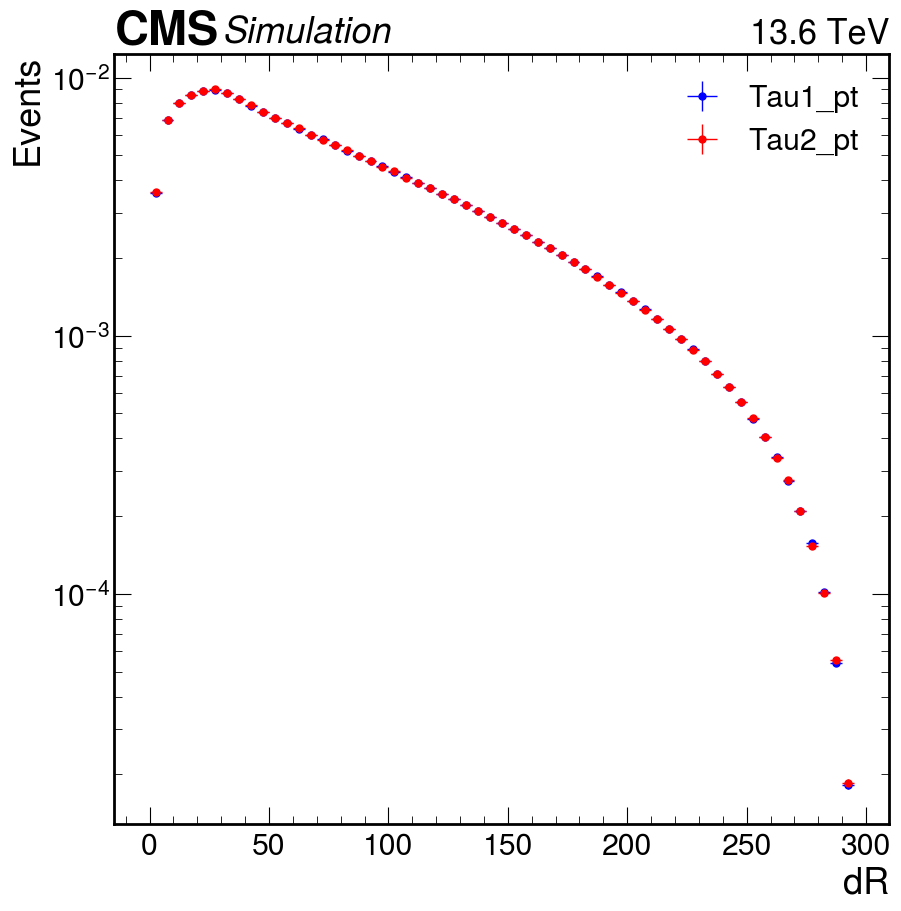

In [26]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
# GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']

fig, ax = plt.subplots()
h1= np.histogram(Tau1_pt,bins=np.arange(0, 300, 5))
hep.histplot(h1,histtype='errorbar',linewidth=2, yerr=True, xerr=2.5,color='b',label="Tau1_pt", density=1)
h2= np.histogram(Tau2_pt,bins=np.arange(0, 300, 5))
hep.histplot(h2,histtype='errorbar',linewidth=2, yerr=True, xerr=2.5,color='r',label="Tau2_pt", density=1)

# plt.xticks(np.arange(0,.5,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
ax.set_yscale('log')
# if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [16]:
# # Load data with consistent cut
# df = RHTree.arrays(["Tau1_pt", "Tau2_pt", "GenA1"], "(Tau1_pt > -111) & (Tau2_pt > -111) & (GenA1 >= 3.6) & (GenA1 <= 14)", library="pd")

# # Compute leading and subleading pt
# pt_leading = np.maximum(df["Tau1_pt"], df["Tau2_pt"])
# pt_subleading = np.minimum(df["Tau1_pt"], df["Tau2_pt"])
# a_mass = df["GenA1"]

# # Define mass bins
# mass_bins = [(3.6, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14)]

# # Plot
# bins = np.arange(0, 300, 5)
# bin_centers = (bins[:-1] + bins[1:]) / 2
# bin_widths = np.diff(bins)

# for i, (low, high) in enumerate(mass_bins):
#     mask = (a_mass >= low) & (a_mass < high)
    

#     # Histogram counts
#     counts_leading, _ = np.histogram(pt_leading[mask], bins=bins)
#     counts_subleading, _ = np.histogram(pt_subleading[mask], bins=bins)



#     # Poisson errors
#     errors_leading = np.sqrt(counts_leading) / (counts_leading.sum() * bin_widths)
#     errors_subleading = np.sqrt(counts_subleading) / (counts_subleading.sum() * bin_widths)


#     # Plot
#     fig, ax = plt.subplots(dpi=300)
#     plt.hist(pt_leading[mask], bins=bins, histtype='step', linestyle='-', linewidth=2, color='darkorange', label=r"Leading $Pt_{\tau, gen}$", density=1)
#     plt.hist(pt_subleading[mask], bins=bins, histtype='step', linewidth=2, color='royalblue', label=r"Subleading $Pt_{\tau, gen}$", density=1)

#     # Error bars on top
#     ax.errorbar(bin_centers, counts_leading/(counts_leading.sum() * bin_widths), yerr=errors_leading, fmt='none',
#                 ecolor='darkorange', elinewidth=1, capsize=2, capthick=1, barsabove=1)

#     ax.errorbar(bin_centers, counts_subleading/(counts_subleading.sum() * bin_widths), yerr=errors_subleading, fmt='none',
#                 ecolor='royalblue', elinewidth=1, capsize=2, capthick=1,barsabove=1)

#     # Labels and CMS style
#     ax.set_xlabel(r"$Pt_{\tau, gen}$ [GeV]")
#     ax.set_ylabel("Normalized Events / 5 GeV")
#     ax.set_yscale('log')
#     ax.legend(loc='upper right',title=f"{low} ≤ $m_{{A,\\,gen}}$ < {high} GeV", fontsize=20,title_fontsize=20,frameon=False,fancybox=True )
#     hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
#     low =  str(low).replace('.', 'p')
#     high =  str(high).replace('.', 'p')
#     hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
#     plt.tight_layout()
#     plt.savefig(f"{out_dir}/gen_ATo2Tau_leading_subleading_tau_pt_A_mass_{low}_to_{high}_GeV.pdf",facecolor='w',dpi=300)
#     plt.show()

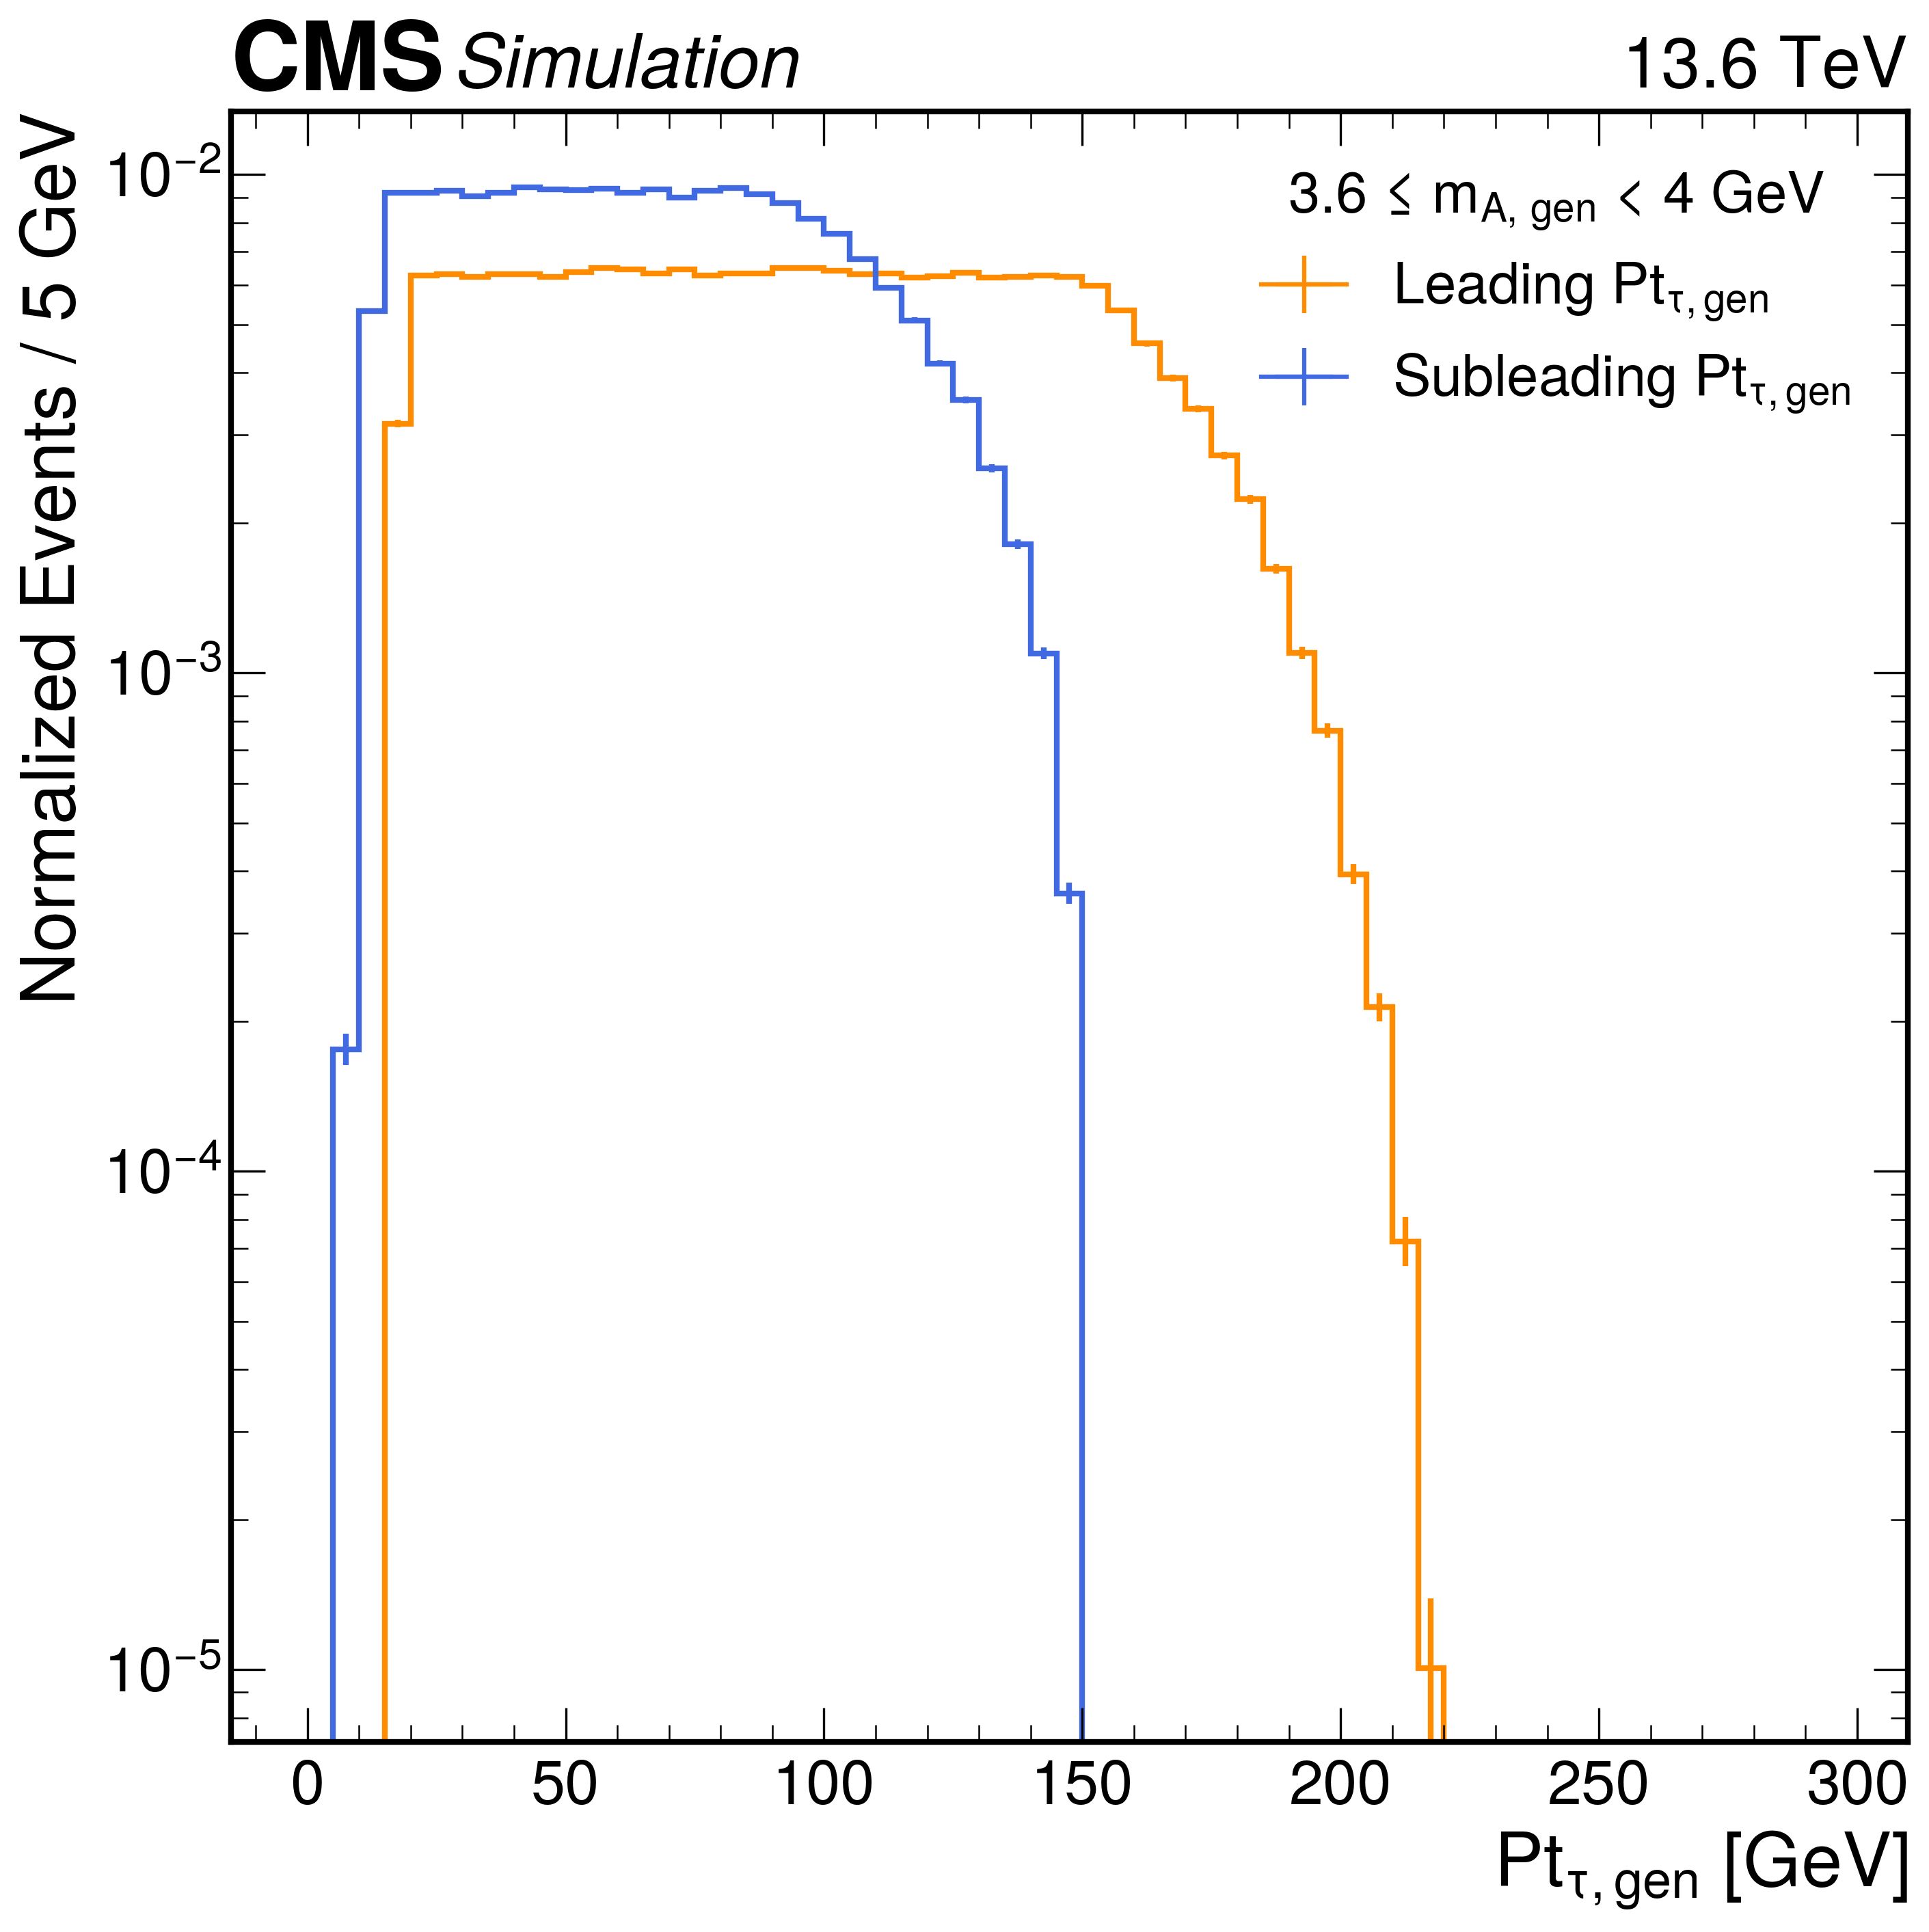

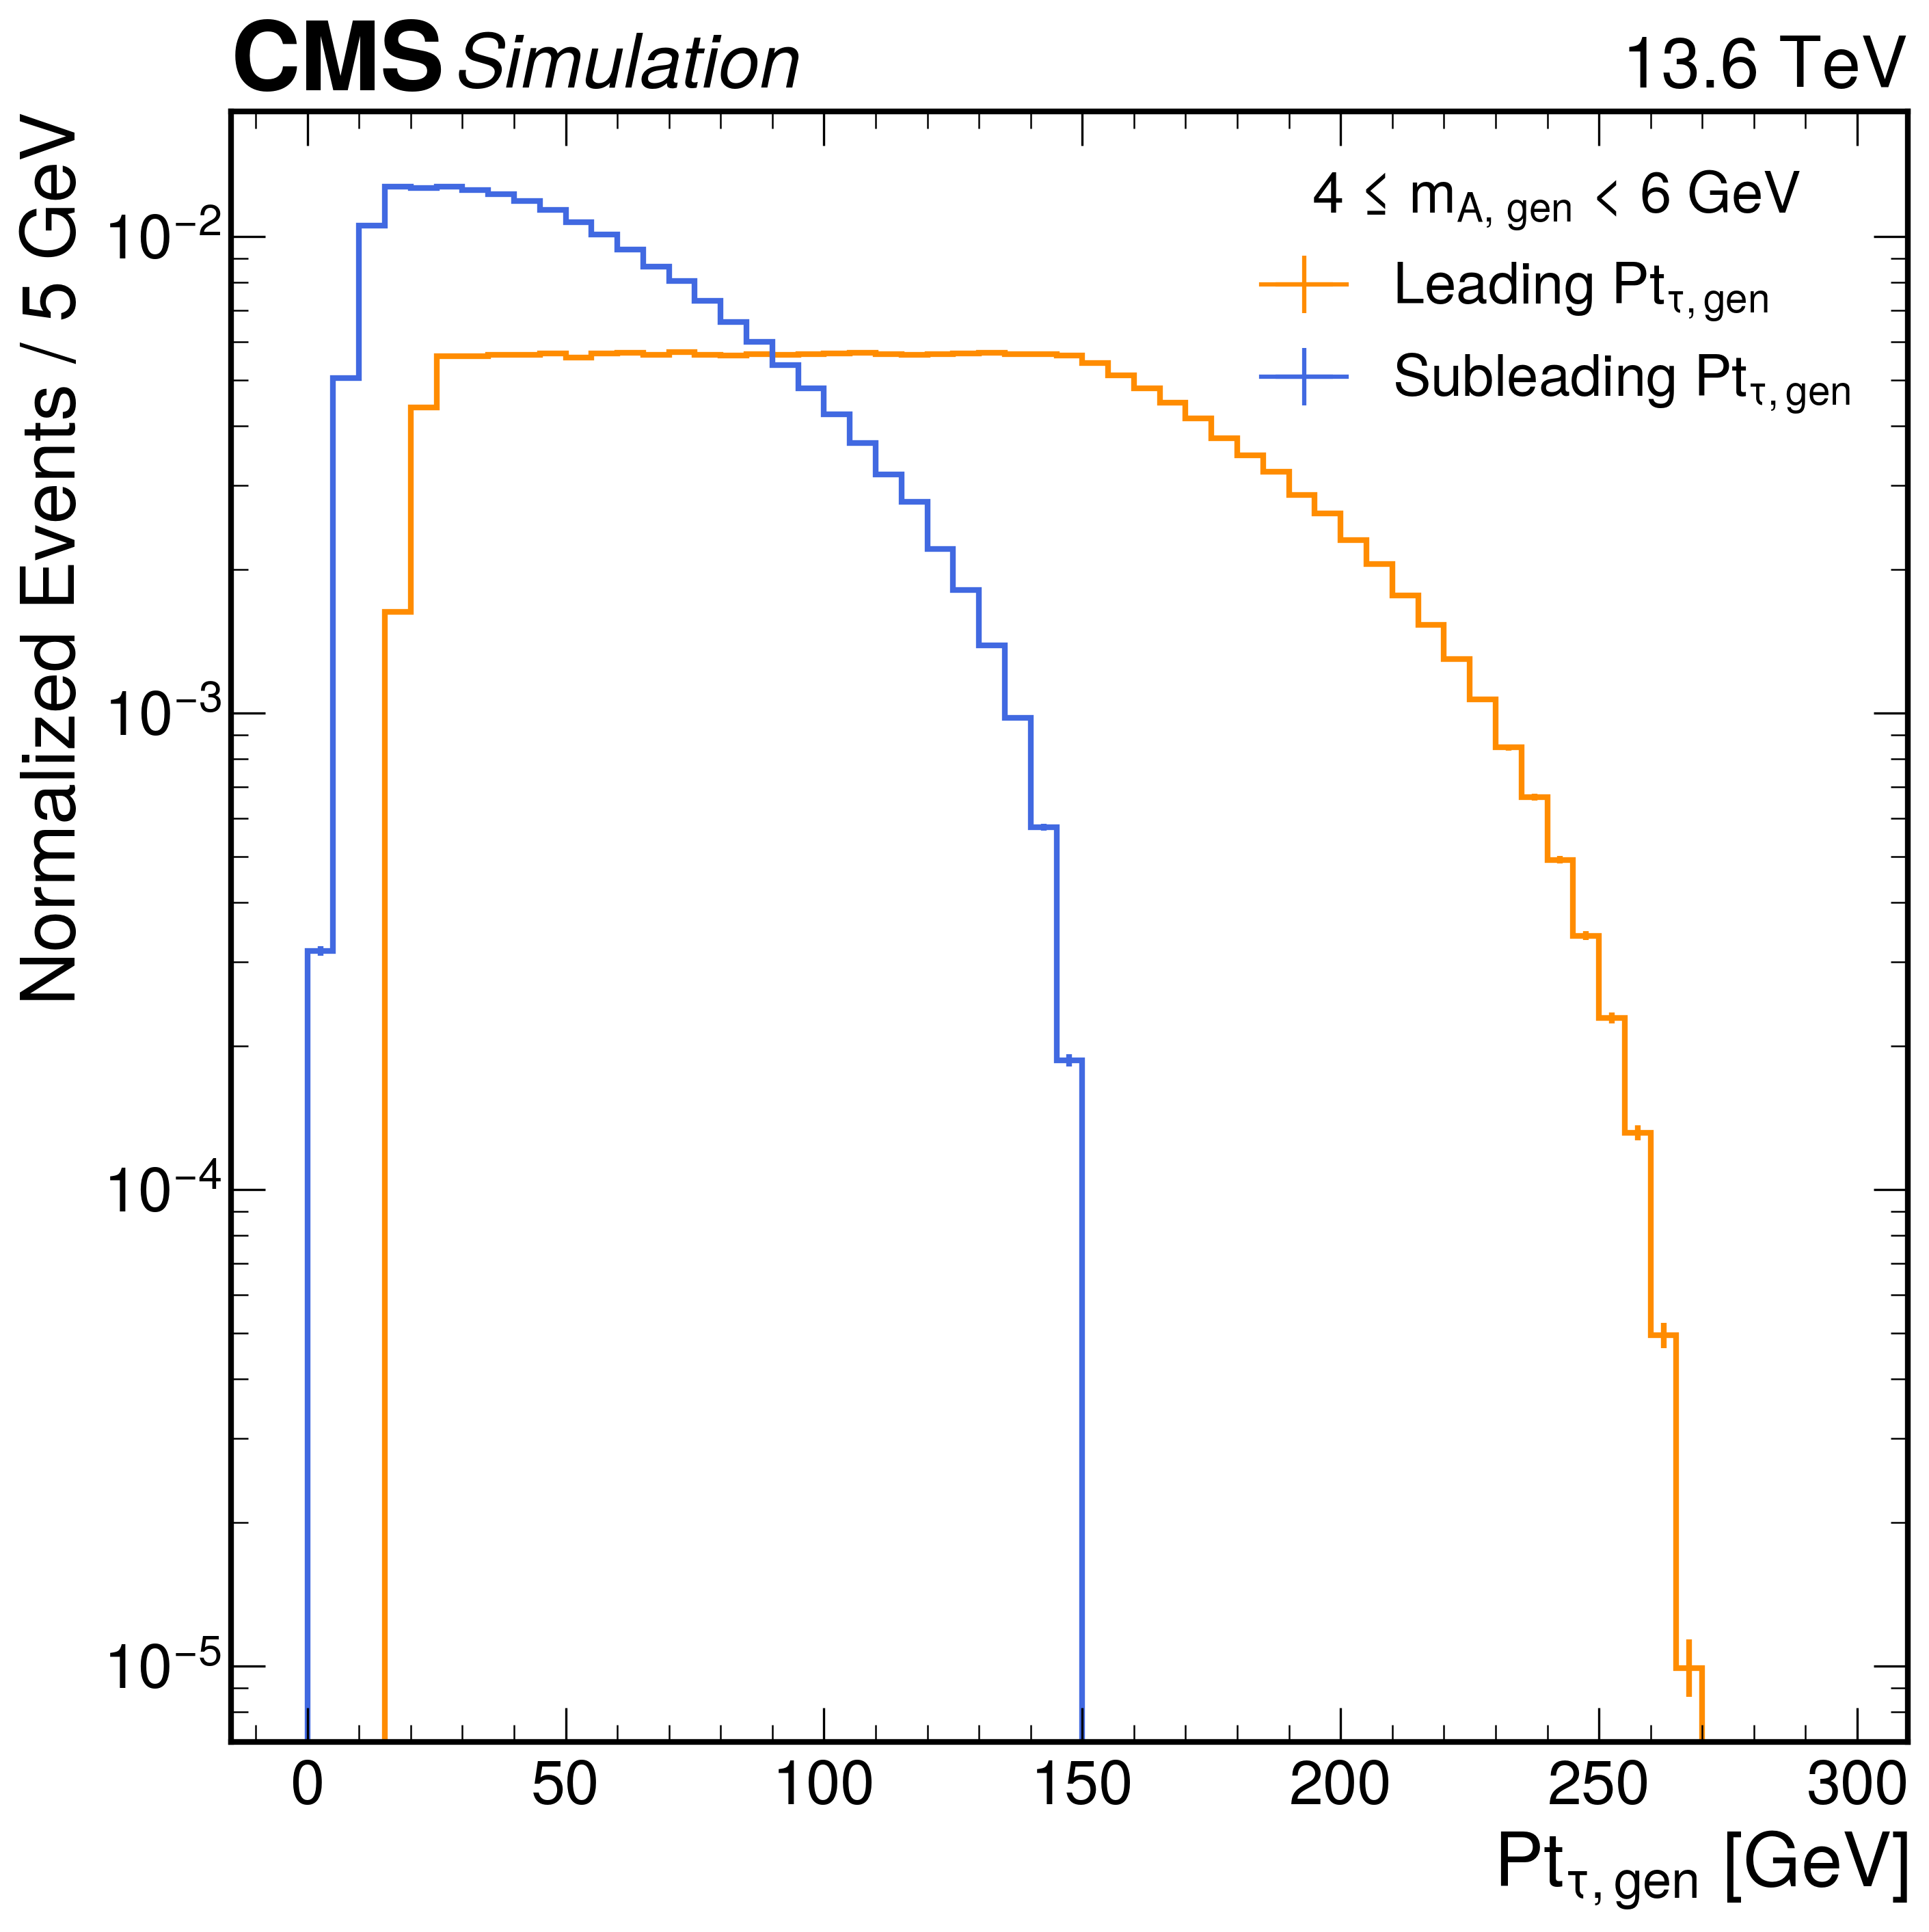

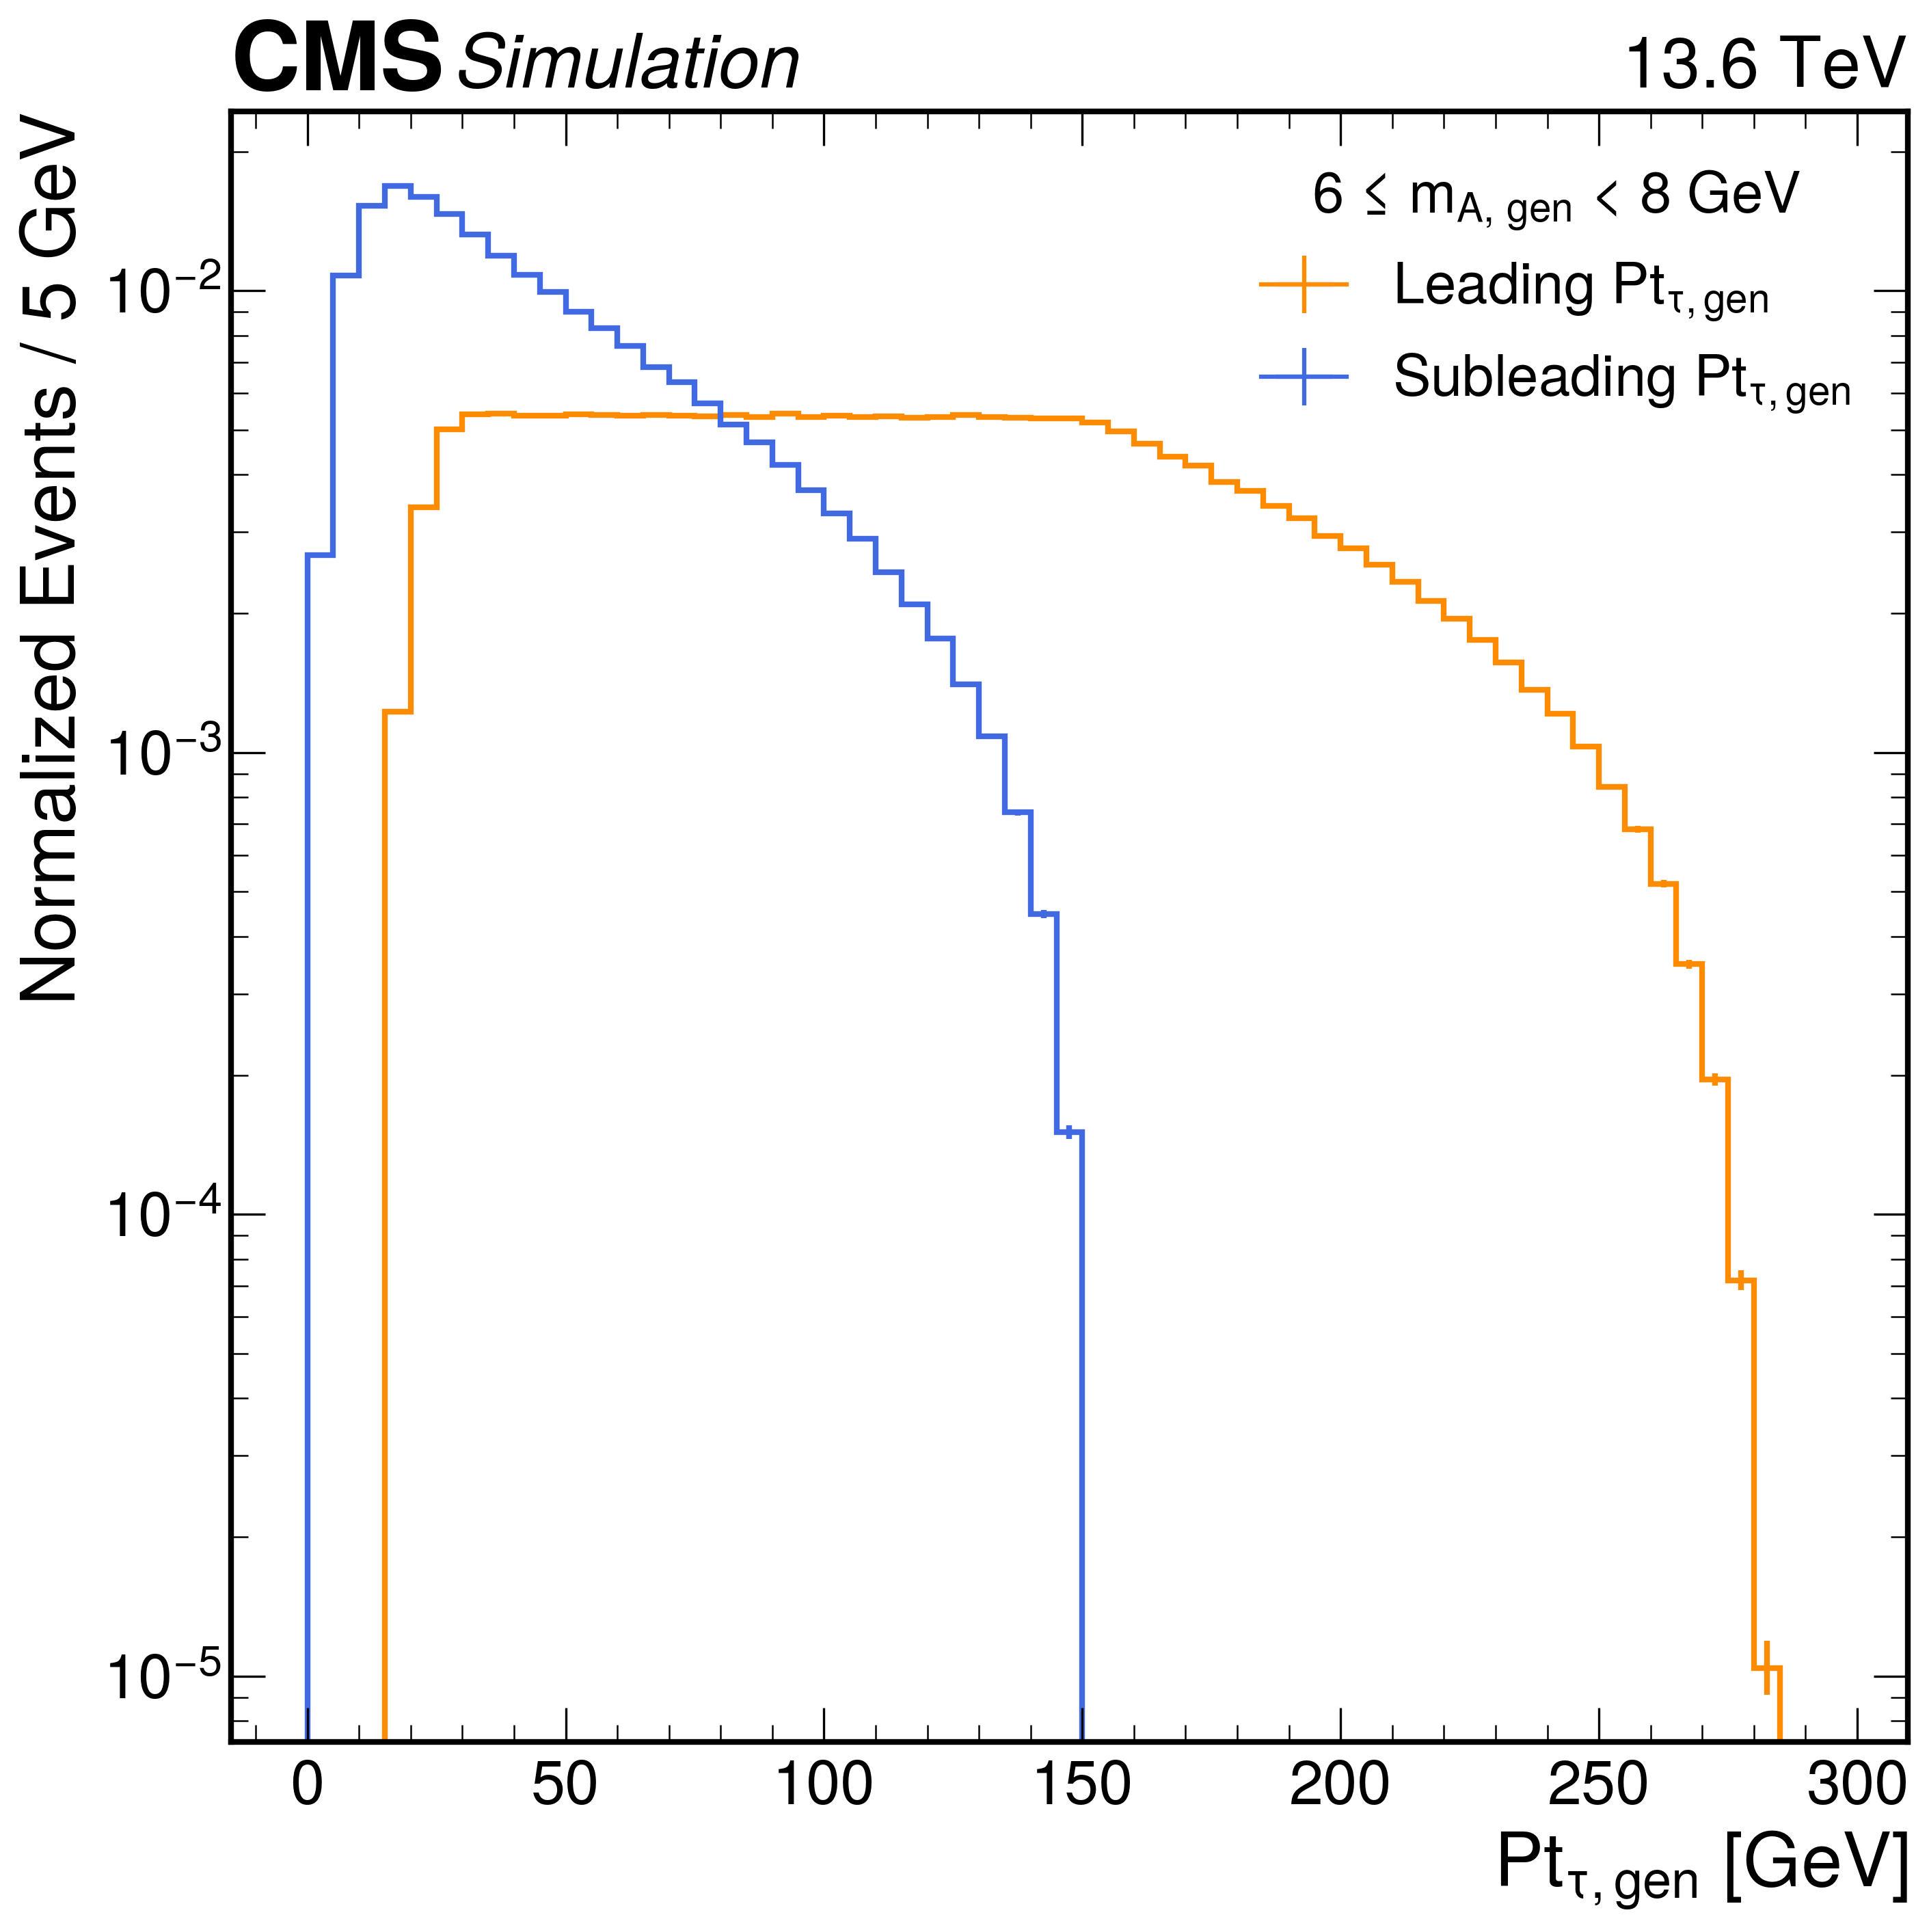

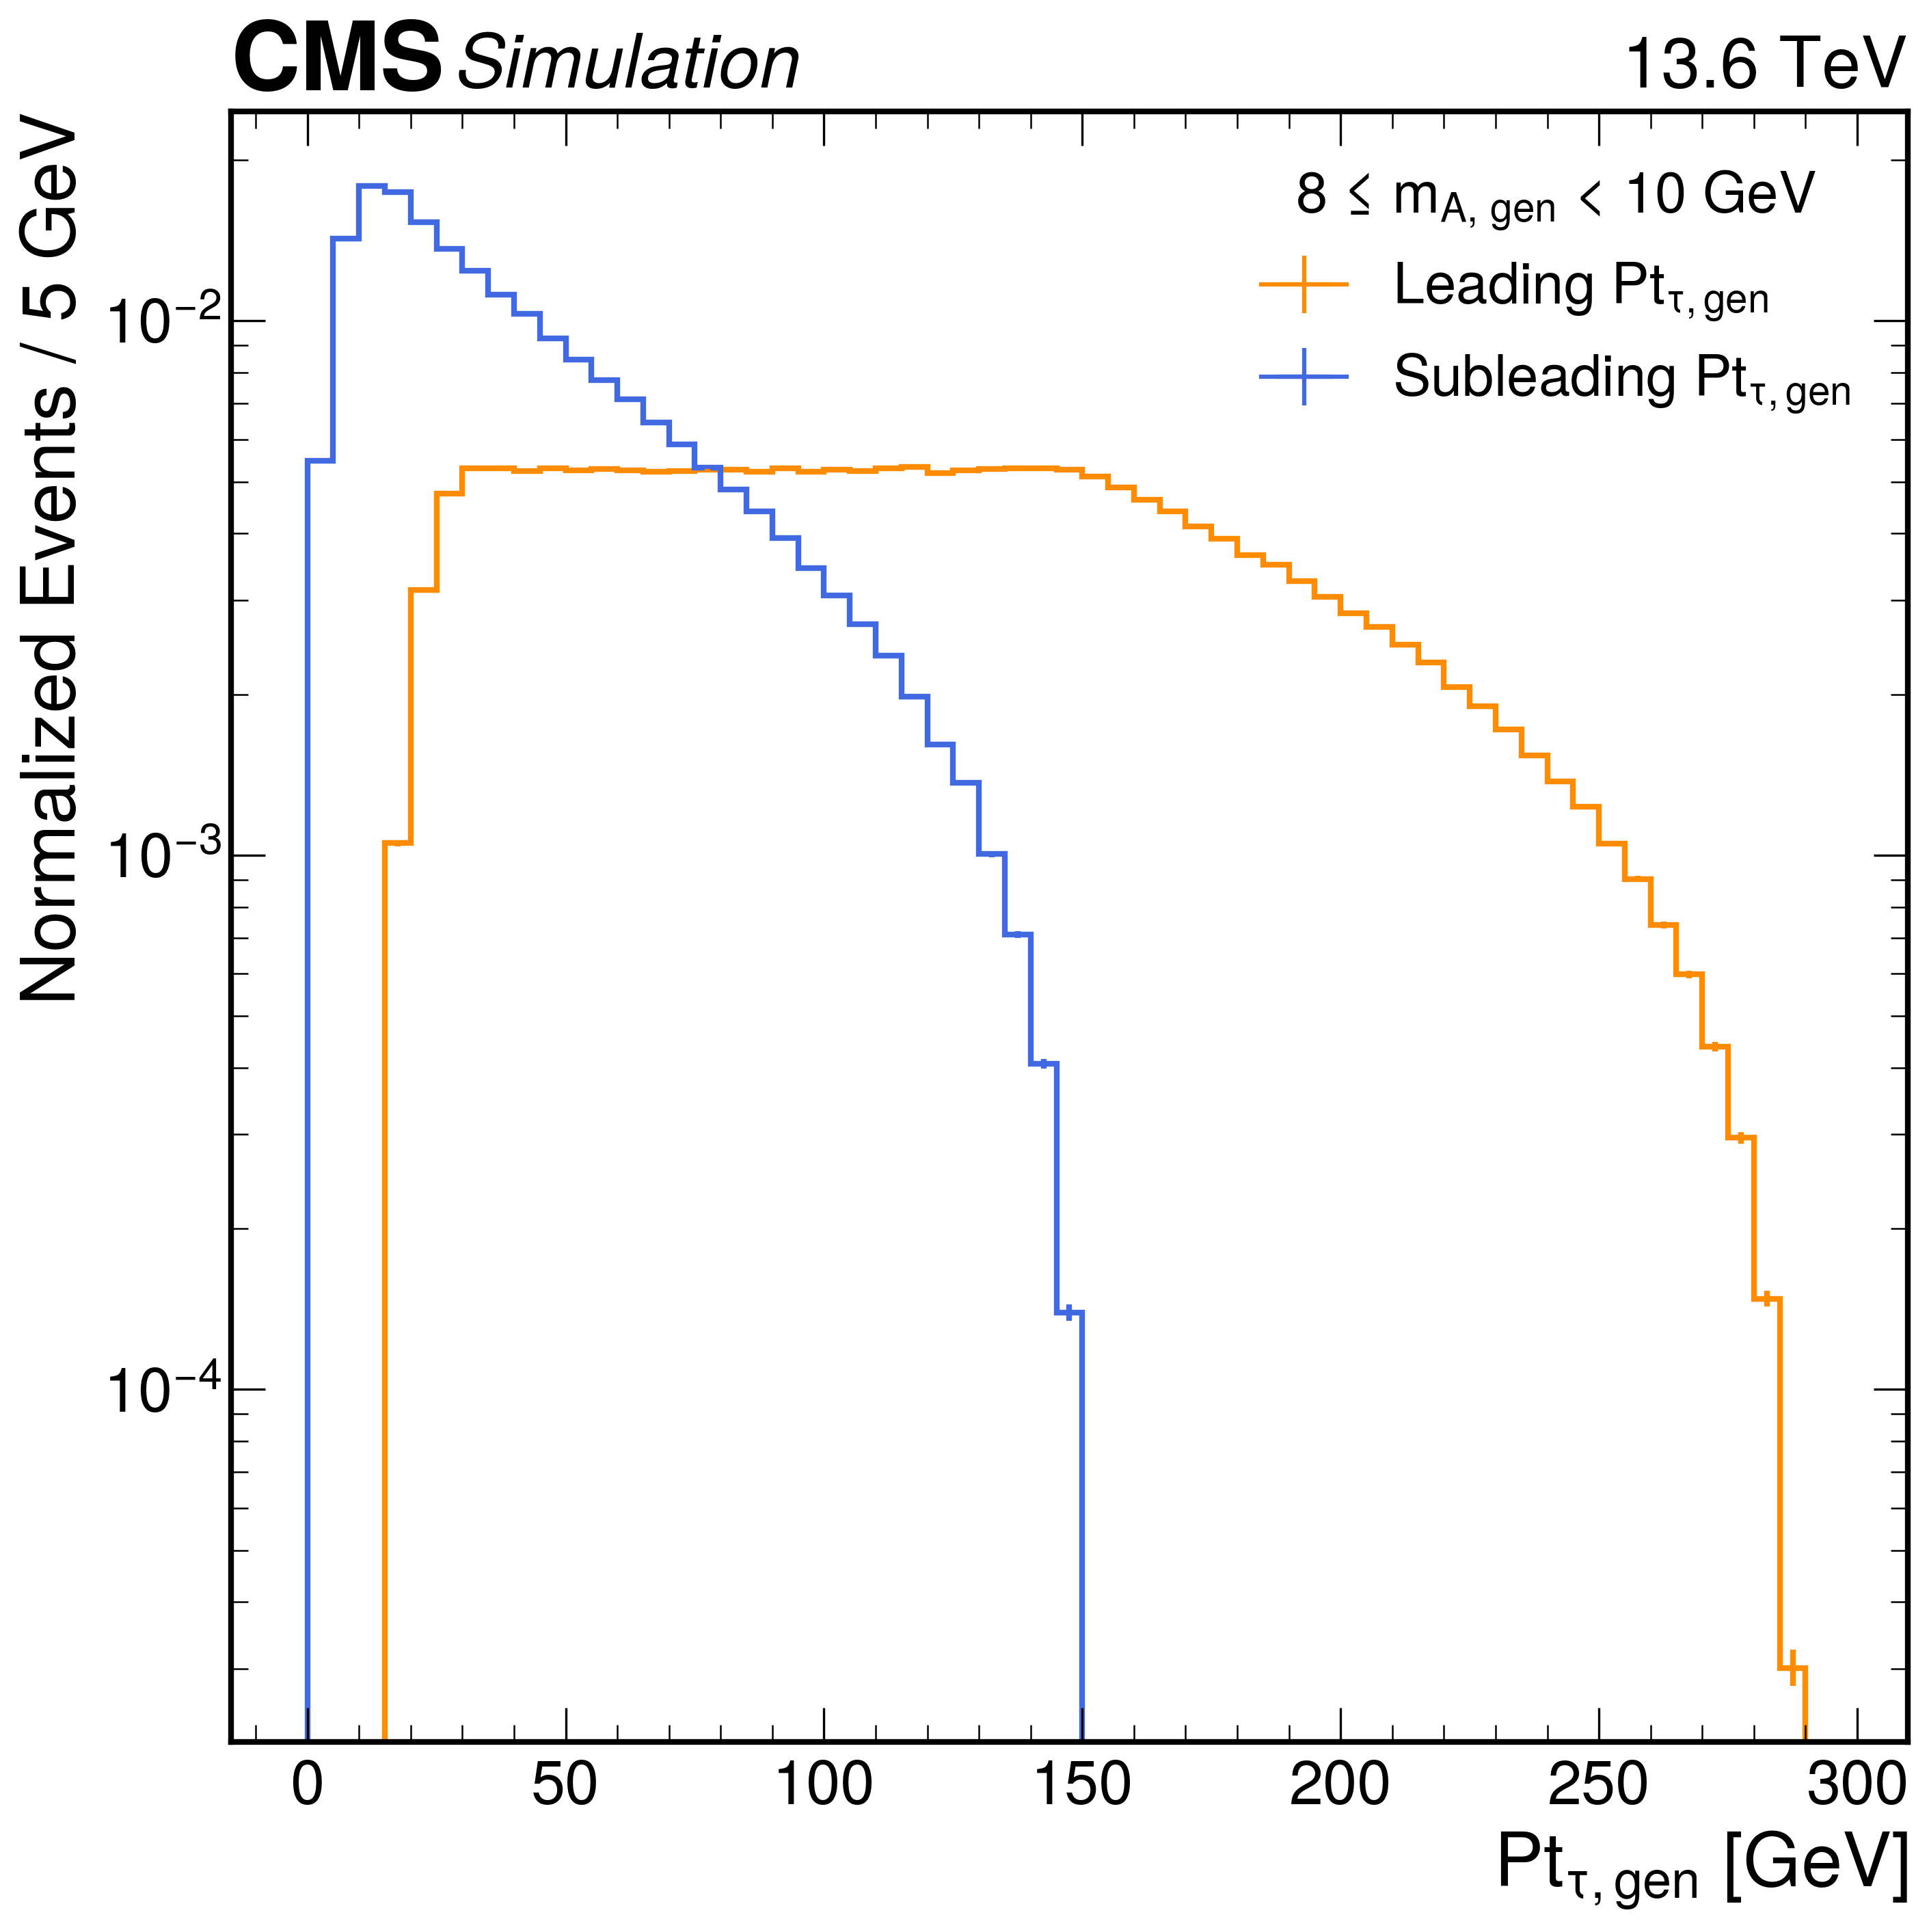

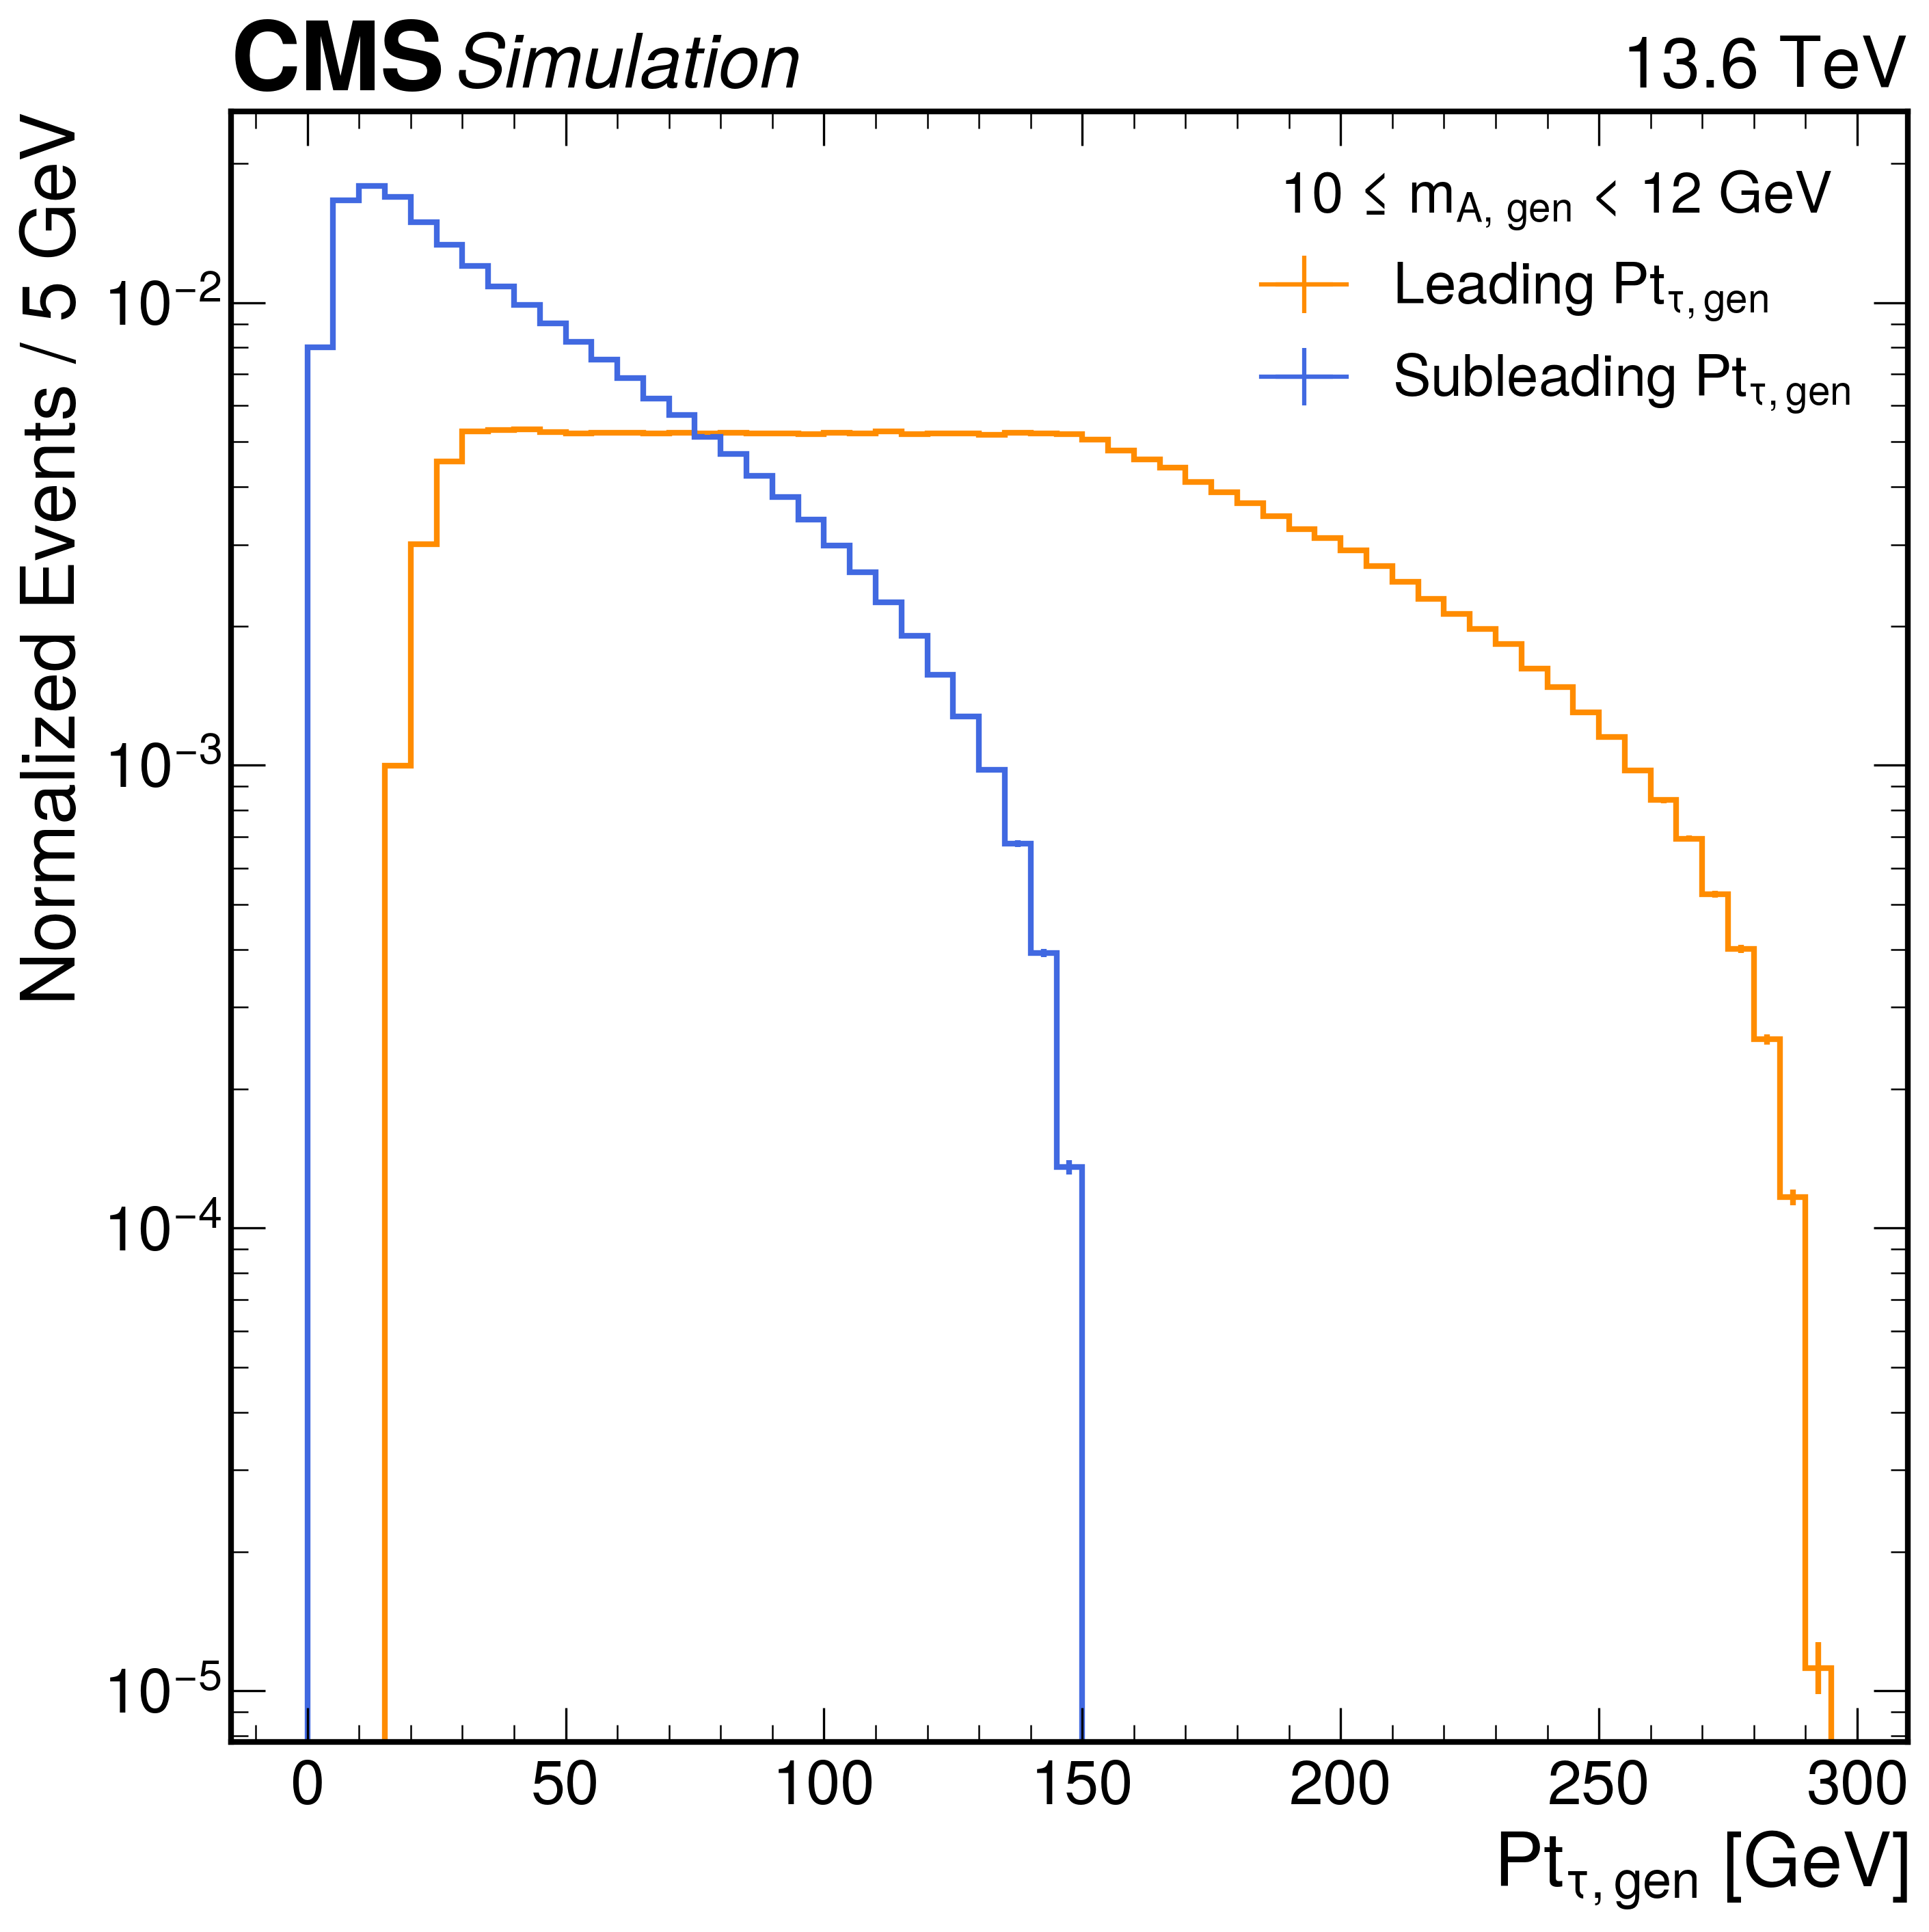

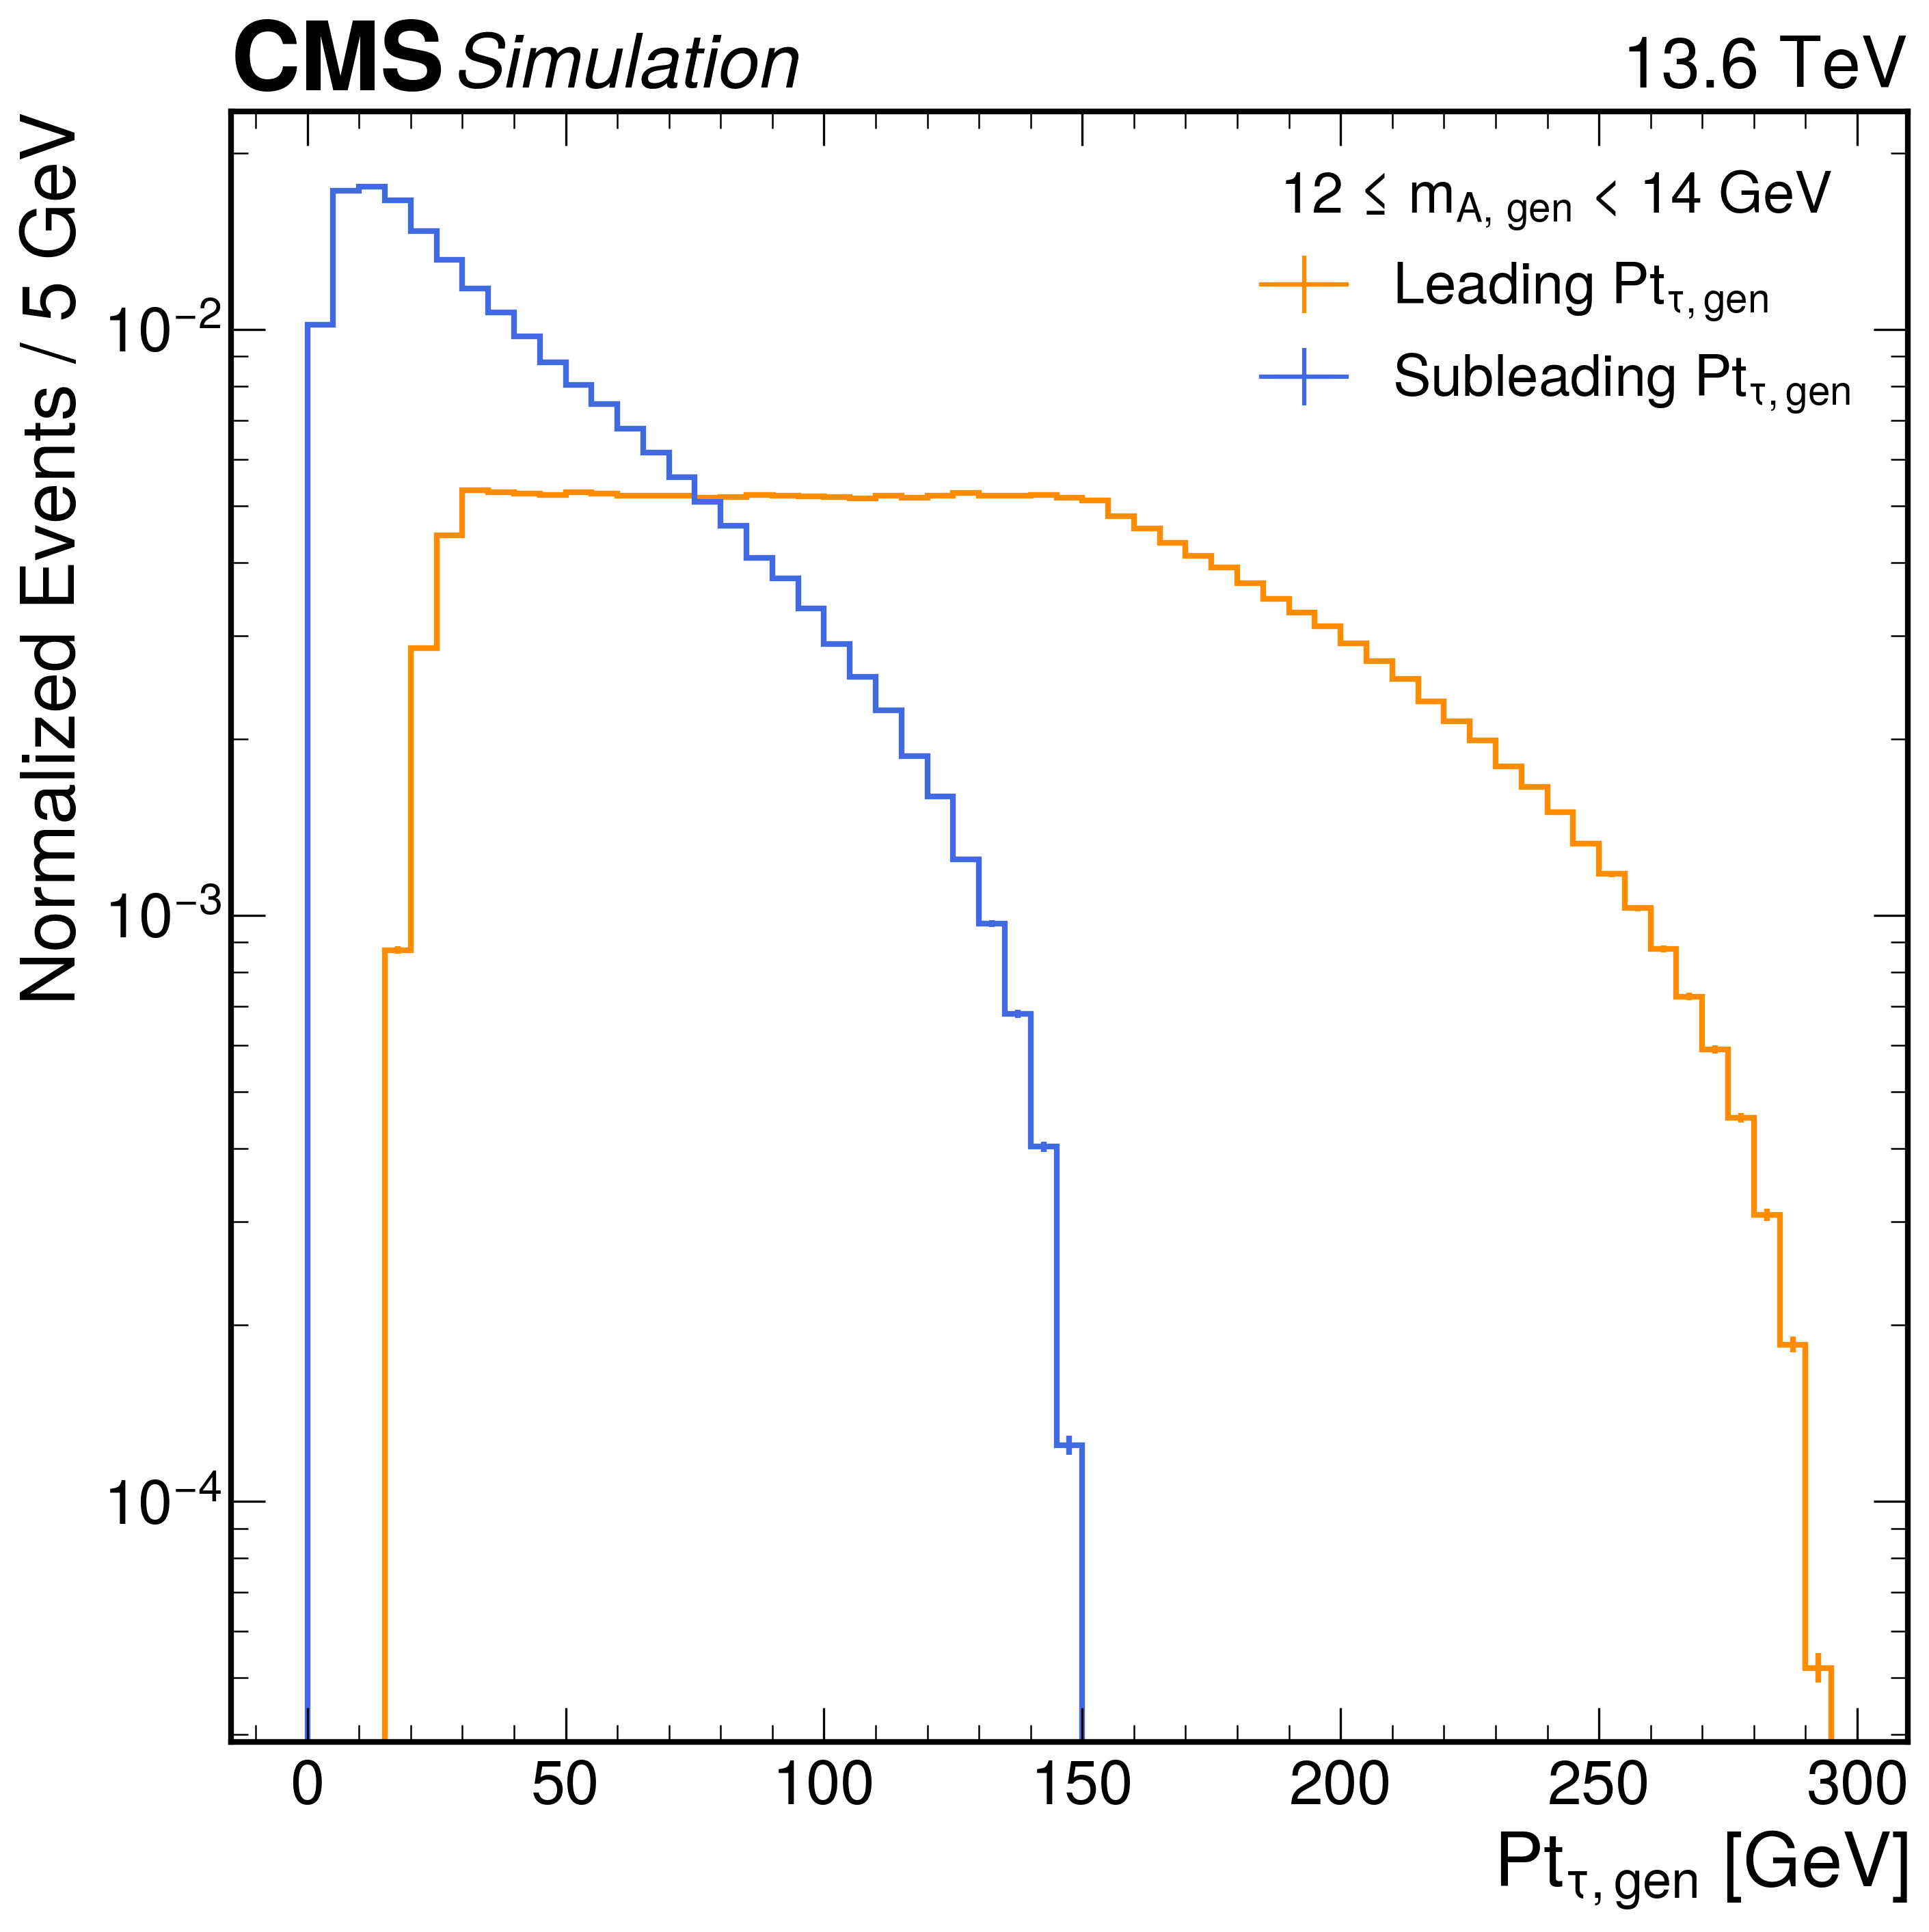

In [14]:
# Load data with consistent cut
df = RHTree.arrays(["Tau1_pt", "Tau2_pt", "GenA1"], "(Tau1_pt > -111) & (Tau2_pt > -111) & (GenA1 >= 3.6) & (GenA1 <= 14)", library="pd")

# Compute leading and subleading pt
pt_leading = np.maximum(df["Tau1_pt"], df["Tau2_pt"])
pt_subleading = np.minimum(df["Tau1_pt"], df["Tau2_pt"])
a_mass = df["GenA1"]

# Define mass bins
mass_bins = [(3.6, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14)]

# Plot
bins = np.arange(0, 300, 5)

for i, (low, high) in enumerate(mass_bins):
    mask = (a_mass >= low) & (a_mass < high)

    # Plot
    fig, ax = plt.subplots(dpi=300)
    h1 = np.histogram(pt_leading[mask], bins=bins,)
    hep.histplot(h1, histtype='step',yerr=True, linestyle='-', linewidth=2, color='darkorange', label=r"Leading $Pt_{\tau, gen}$", density=1)
    h2 = np.histogram(pt_subleading[mask], bins=bins,)
    hep.histplot(h2, histtype='step',yerr=True, linewidth=2, color='royalblue', label=r"Subleading $Pt_{\tau, gen}$", density=1)

    # Labels and CMS style
    ax.set_xlabel(r"$Pt_{\tau, gen}$ [GeV]")
    ax.set_ylabel("Normalized Events / 5 GeV")
    ax.legend(loc='upper right',title=f"{low} ≤ $m_{{A,\\,gen}}$ < {high} GeV", fontsize=20,title_fontsize=20,frameon=False,fancybox=True )
    low =  str(low).replace('.', 'p')
    high =  str(high).replace('.', 'p')
    hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
    ax.set_yscale('log')
    plt.tight_layout()
    # plt.savefig(f"{out_dir}/gen_ATo2Tau_leading_subleading_tau_pt_A_mass_{low}_to_{high}_GeV.pdf",facecolor='w',dpi=300)
    plt.show()

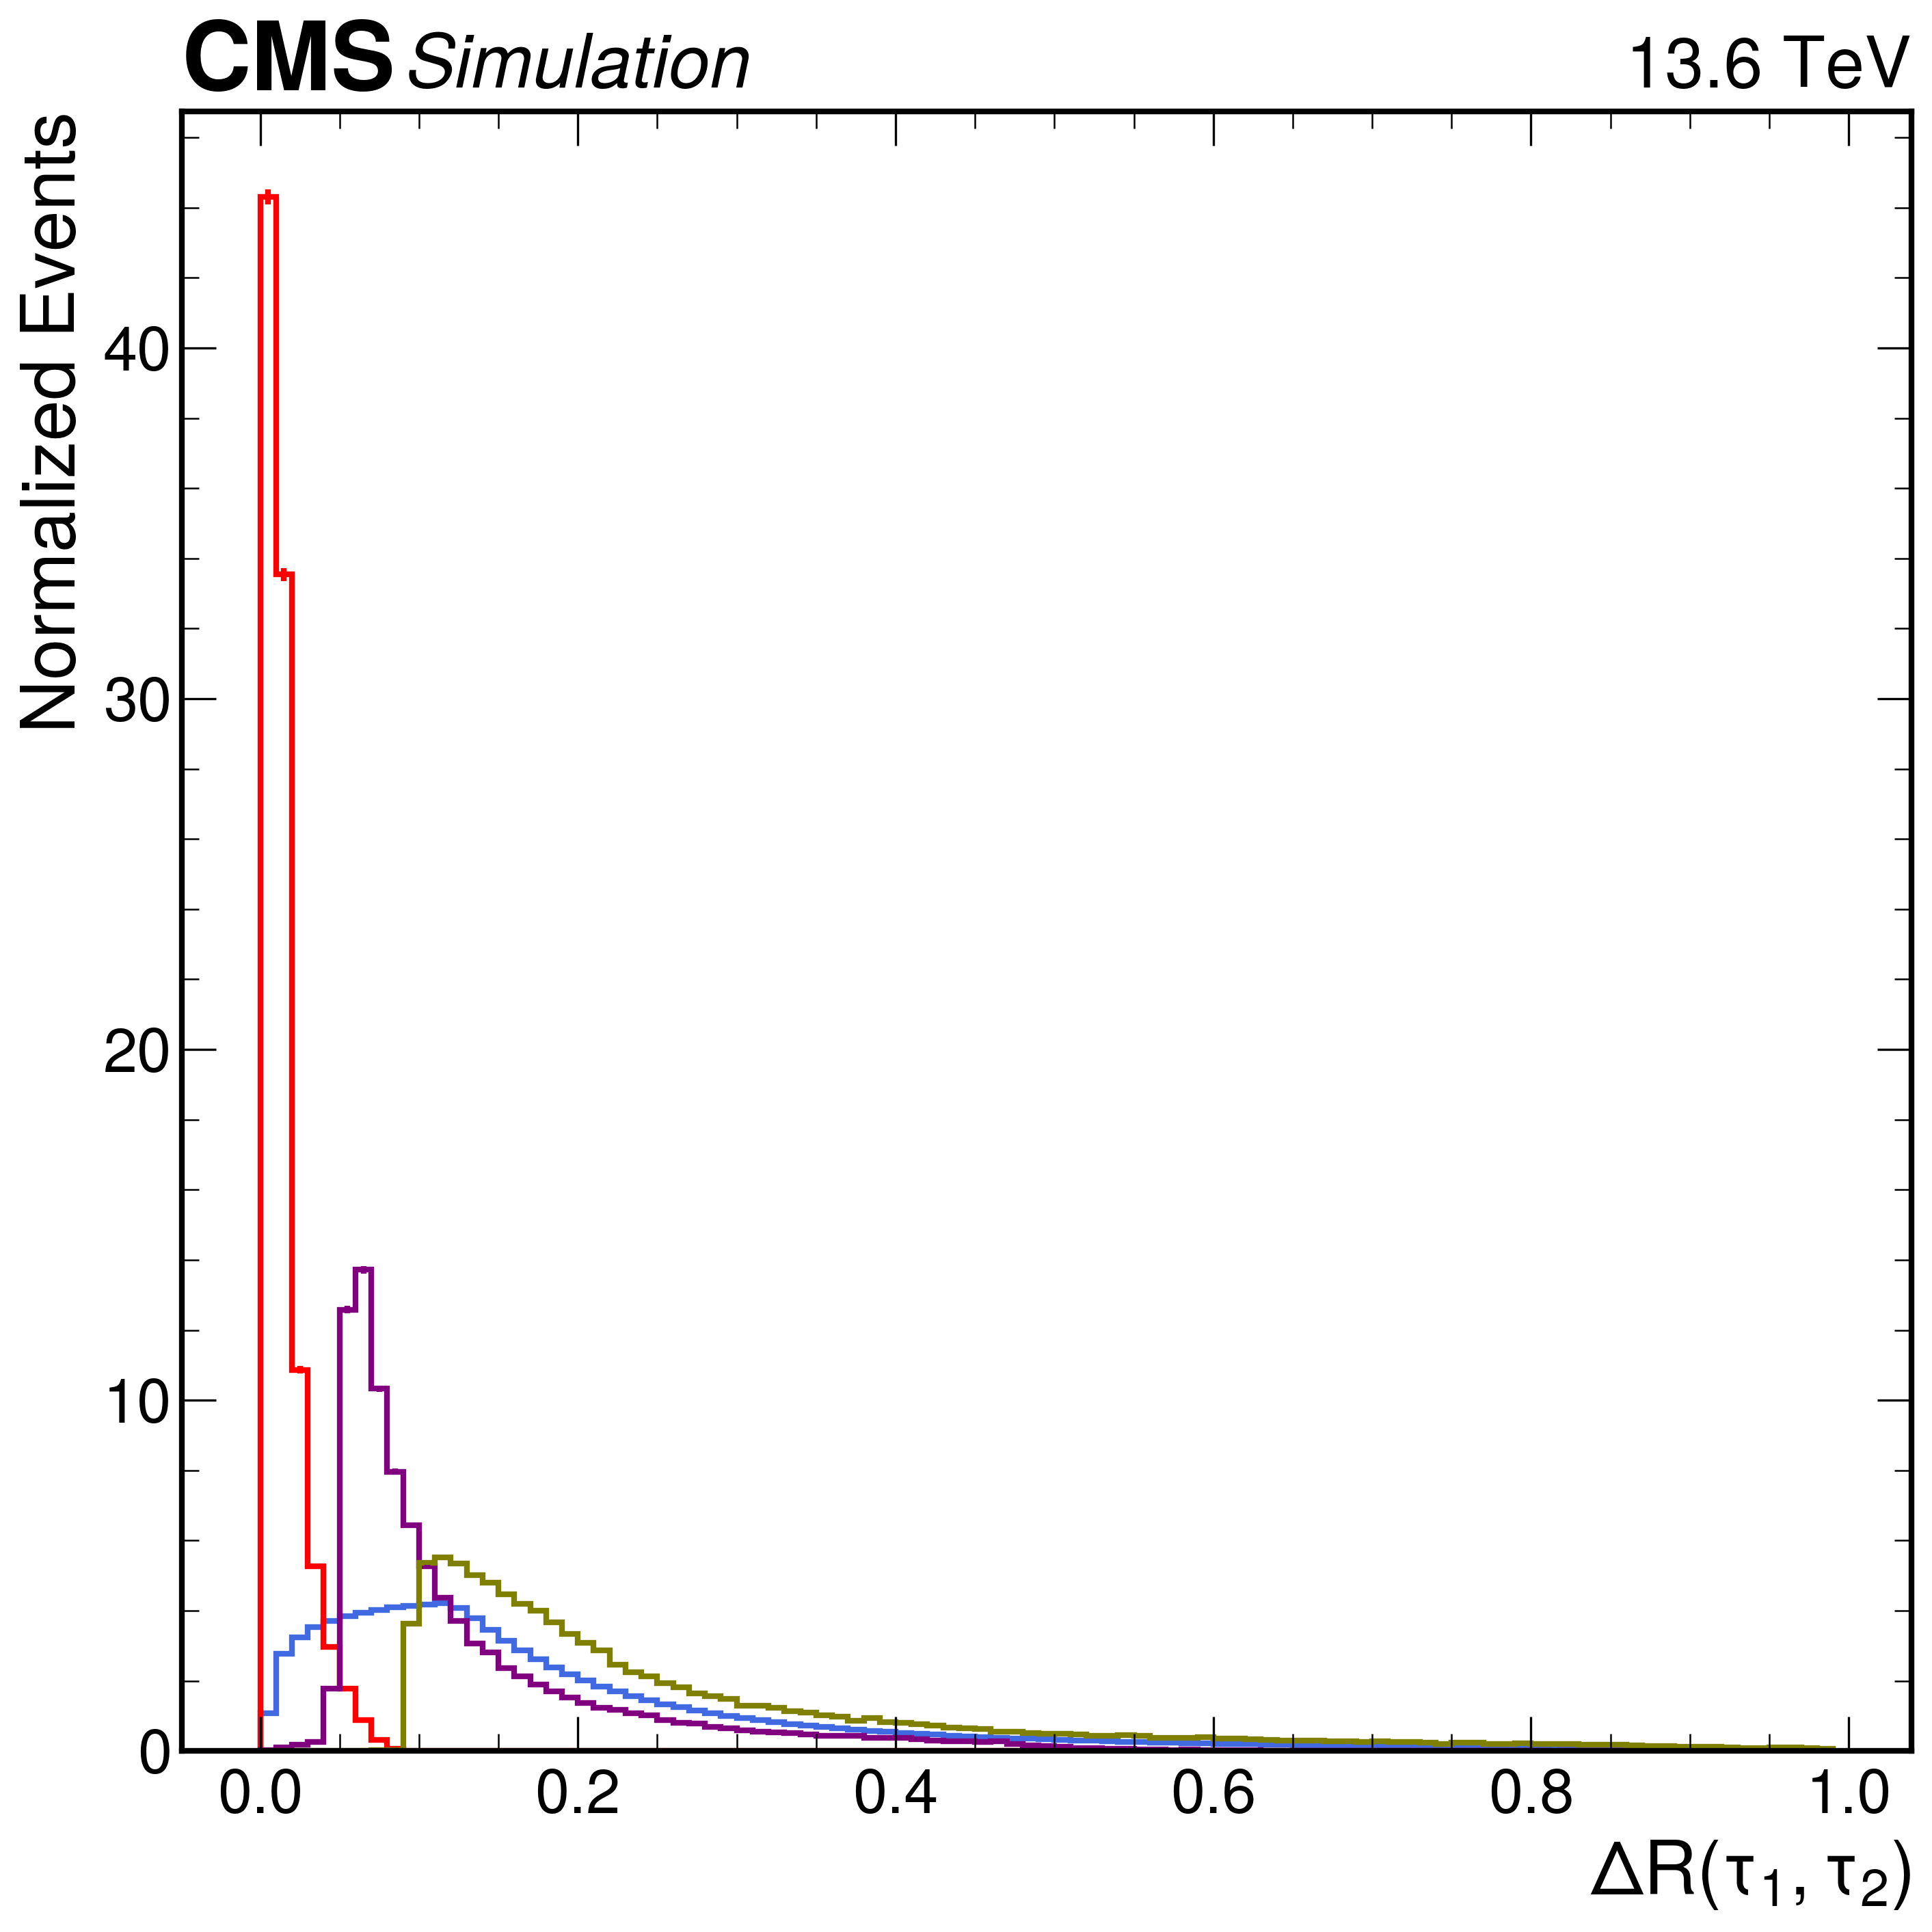

In [12]:
# Load data with consistent cut
df = RHTree.arrays(["Tau1_pt", "Tau2_pt", "GenA1", "dR_Tau1_Tau2"], "(Tau1_pt > -111) & (Tau2_pt > -111) & (GenA1 >= 3.6) & (GenA1 <= 18)", library="pd")

# Compute leading and subleading pt
# pt_leading = np.maximum(df["Tau1_pt"], df["Tau2_pt"])
# pt_subleading = np.minimum(df["Tau1_pt"], df["Tau2_pt"])
a_mass = df["GenA1"]
dr = df["dR_Tau1_Tau2"]
# Define mass bins
mass_bins = [(3.6, 3.8), (7.9, 8.1), (13.9, 14.1)]

# Plot
bins = np.arange(0, 1, 0.01)
# colors = ['r', 'b', 'g', 'orange', 'purple', 'brown', 'teal', 'olive']
colors = ['r',  'purple', 'olive']
fig, ax = plt.subplots(dpi=300)
h2 = np.histogram(dr, bins=bins,)
hep.histplot(h2, histtype='step',yerr=True, linewidth=2, color='royalblue', label=r"$A ->{\tau \tau}$", density=1)

for i, (low, high) in enumerate(mass_bins):
    mask = (a_mass >= low) & (a_mass < high)

    # Plot
    
    h1 = np.histogram(dr[mask], bins=bins,)
    hep.histplot(h1, histtype='step',yerr=True, linestyle='-', linewidth=2, color=colors[i], label=rf"$m_{{A,\\,gen}}$ = {low/2 + high/2} GeV", density=1)
    
    # ax.legend(loc='best',title="From A2Tau samples", fontsize=20,title_fontsize=20,frameon=False,fancybox=True )


ax.set_xlabel(r"$\Delta R (\tau_1, \tau_2)$")
ax.set_ylabel("Normalized Events")
# ax.legend(loc='best',title="From A2Tau samples", fontsize=20,title_fontsize=20,frameon=False,fancybox=True )
low =  str(low).replace('.', 'p')
high =  str(high).replace('.', 'p')
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.tight_layout()
# plt.savefig(f"{out_dir}/gen_HToAATo4Tau_dR_fo_all_signal_mass_errorbars.pdf", facecolor='w', dpi=300)
plt.show()

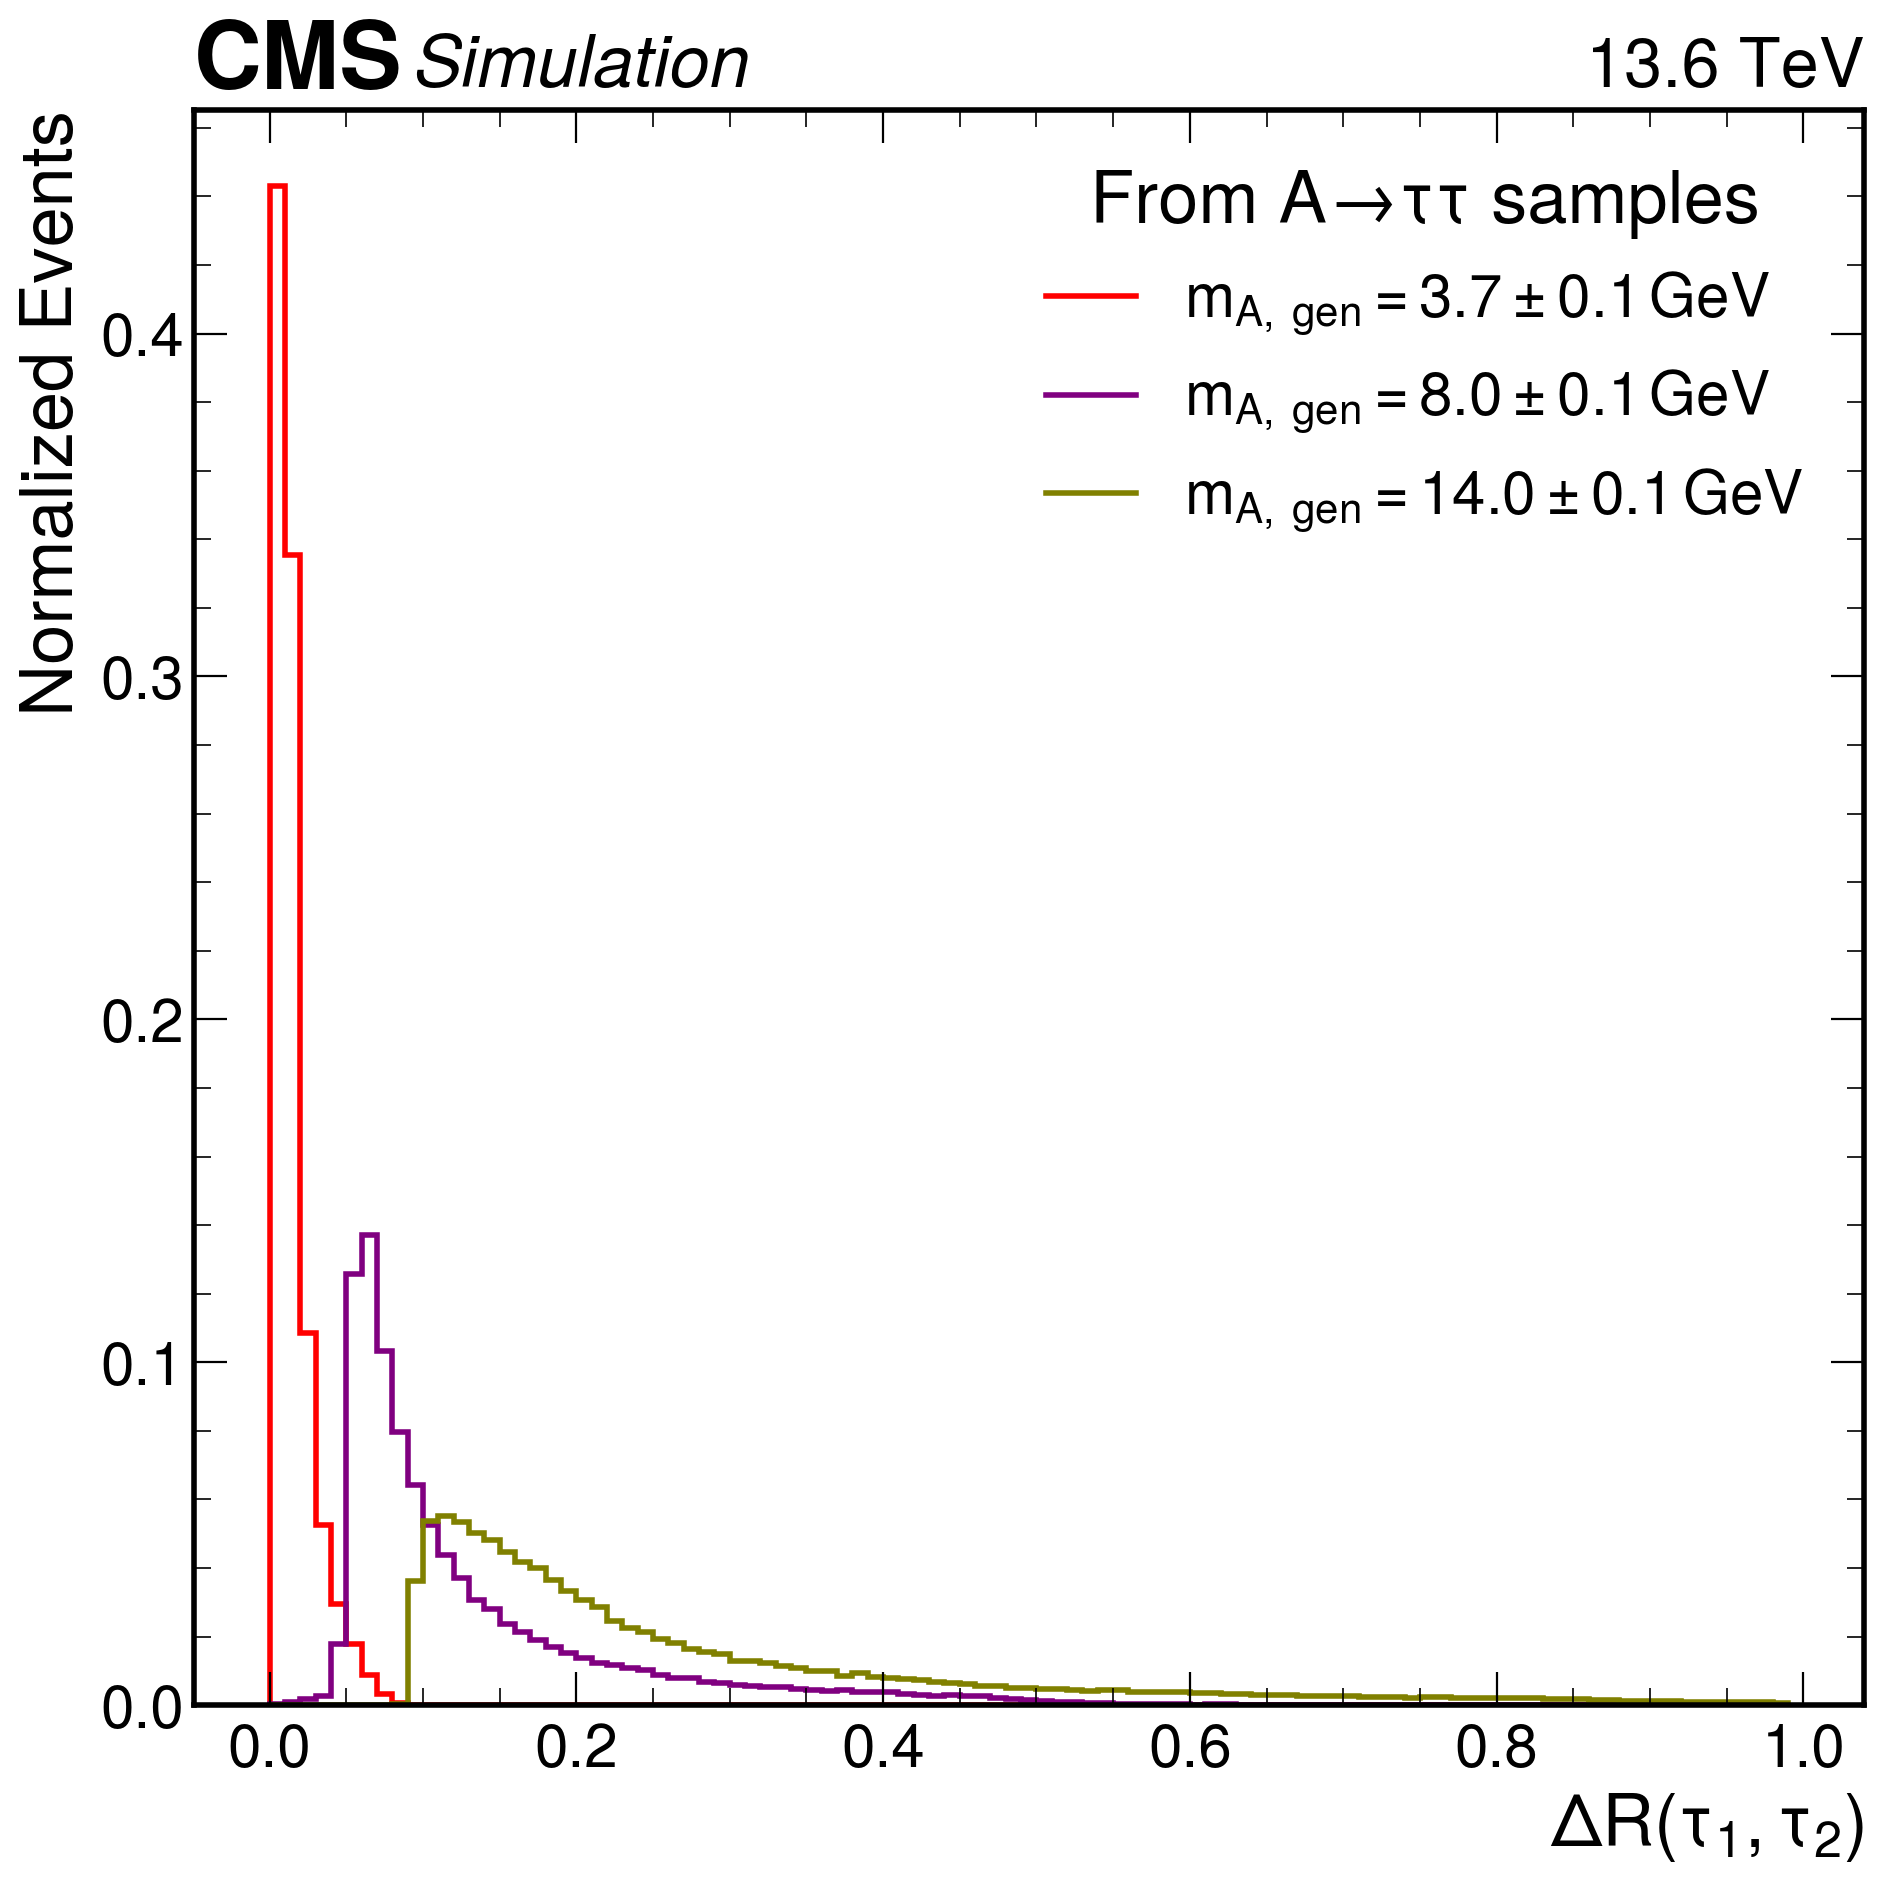

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

# Load data with consistent cut
df = RHTree.arrays(
    ["Tau1_pt", "Tau2_pt", "GenA1", "dR_Tau1_Tau2"],
    "(Tau1_pt > -111) & (Tau2_pt > -111) & (GenA1 >= 3.6) & (GenA1 <= 18)",
    library="pd"
)

a_mass = df["GenA1"]
dr = df["dR_Tau1_Tau2"]

# Mass bins for sub-selections
mass_bins = [(3.6, 3.8), (7.9, 8.1), (13.9, 14.1)]
# mass_bins = [(3.6, 3.8), (3.9, 4.1), (4.9, 5.1), (5.9, 6.1), (7.9, 8.1), (9.9, 10.1), (11.9, 12.1), (13.9, 14.1)]

# ΔR binning
bins = np.arange(0, 1, 0.01)
colors = ['r', 'purple', 'olive']
# colors = ['r', 'b', 'g', 'orange', 'purple', 'brown', 'teal', 'olive']
fig, ax = plt.subplots(dpi=200)

# Inclusive histogram (all signal)
# mask_ = (a_mass >= 3.6) & (a_mass <= 14)
# counts, edges = np.histogram(dr[mask_], bins=bins)

# counts_ = counts / np.sum(counts)
# hep.histplot(
#     (counts_, edges),
#     histtype='step',
#     # yerr=np.sqrt(counts),        # <-- proper error bars
#     linewidth=2,
#     color='royalblue',
#     label=rf"$m_{{A,\;gen}}$ = [3.6, 14] GeV",
#     density=0,
#     ax=ax
# )

# Mass-split histograms
for i, (low, high) in enumerate(mass_bins):
    mask = (a_mass >= low) & (a_mass < high)
    counts, edges = np.histogram(dr[mask], bins=bins)
    mass_label = (low + high) / 2.0   # midpoint for label
    if np.sum(counts) == 0:
        continue  # Skip empty samples

    counts_ = counts / np.sum(counts)
    hep.histplot(
        (counts_, edges),
        histtype='step',
        # yerr=np.sqrt(counts),
        linestyle='-',
        linewidth=2,
        color=colors[i],
        label=rf"$m_{{A,\;gen}} = {mass_label:.1f} \pm {0.1}\, GeV$",
        density=0,
        ax=ax
    )

# Axis labels
ax.set_xlabel(r"$\Delta R(\tau_1, \tau_2)$")
ax.set_ylabel("Normalized Events")

# CMS style
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)

# Legend
ax.legend(title="From A→ττ samples", frameon=False, fancybox=True)

plt.tight_layout()
plt.savefig(f"{out_dir}/gen_ATo2Tau_dR_for_selected_discreate_mass.pdf", dpi=300, facecolor="w")
plt.show()
